In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
df.head(-5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733


In [31]:
df.shape

(1338, 7)

In [32]:
print('Number of Rows', df.shape[0])

Number of Rows 1338


In [33]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## We observe that the range of values are different and there are categorical variable such as gender and smoker present. This will be handled later.

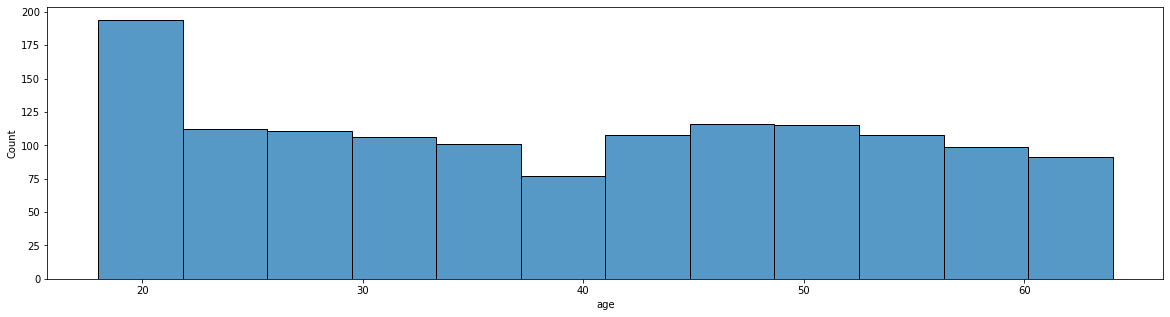

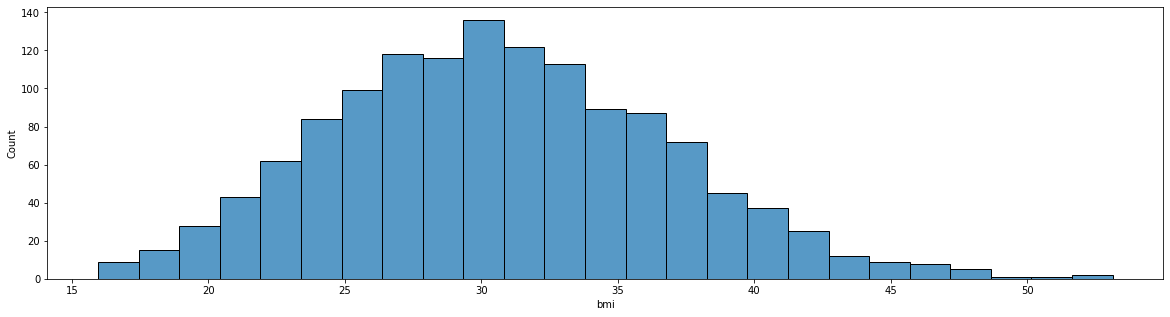

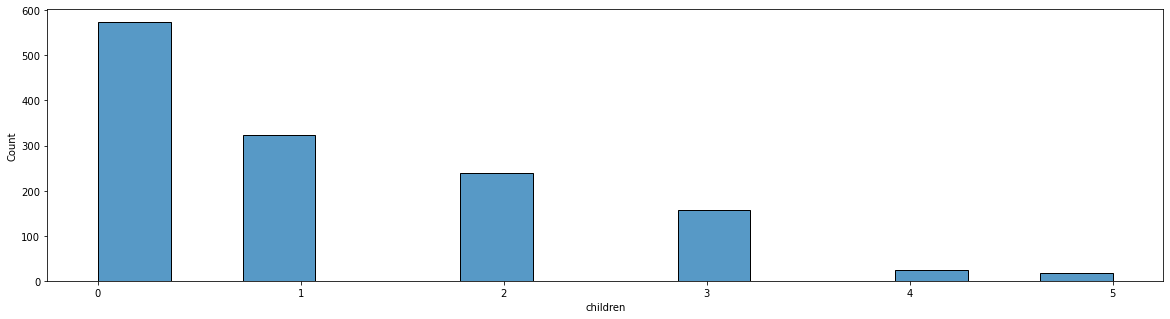

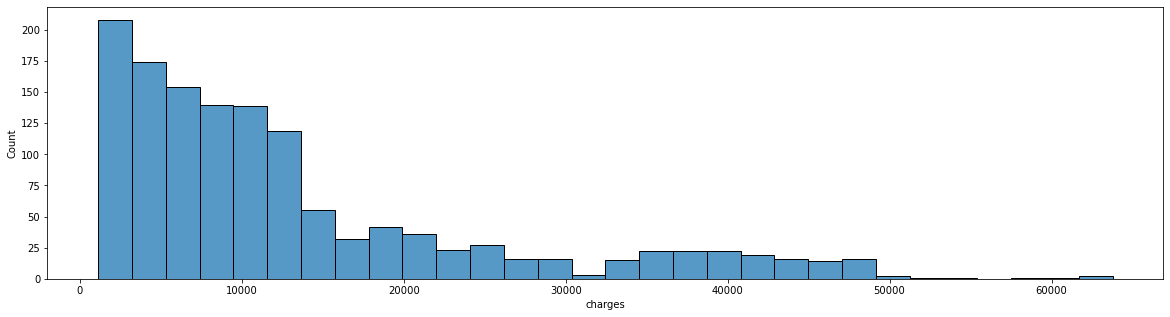

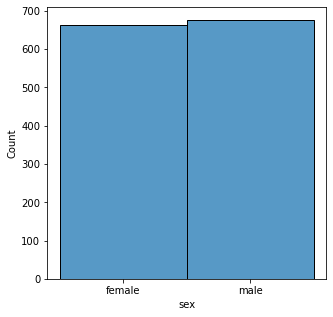

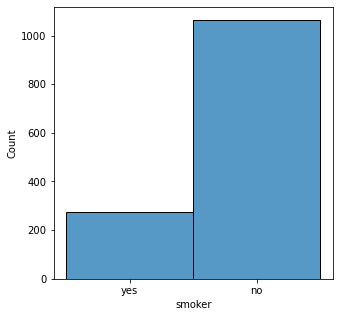

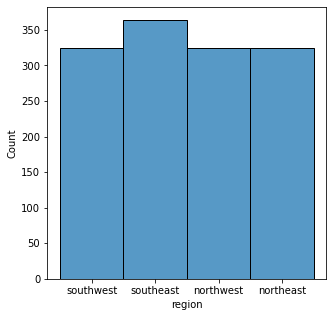

In [35]:
var_list = ['age','bmi','children','charges','sex','smoker','region']
for column in var_list:
    if column in ['sex','smoker','region']:
        plt.figure(figsize =(5,5))
    else:
        plt.figure(figsize=(20,5))
    sns.histplot(x = column,data=df)
    plt.show()

### Here we observe the following trends:

1. People optioning for insurace found between the range (1-64). 
2. People in the 20's is slightly more than the remaining age brackets.
3. BMI is normally distributed with majority of the people falls between the range 20-45.
4. Most People seem to have no children. As the number of children increases,we see fewer parents.
5. Most medical bills are below 20000.
6. We observe equal number of males and females are paying bills.
7. The numbers of smokers are significantly less.
8. All region seems to have equal numbers/representaion except southeast which is slightly higher """

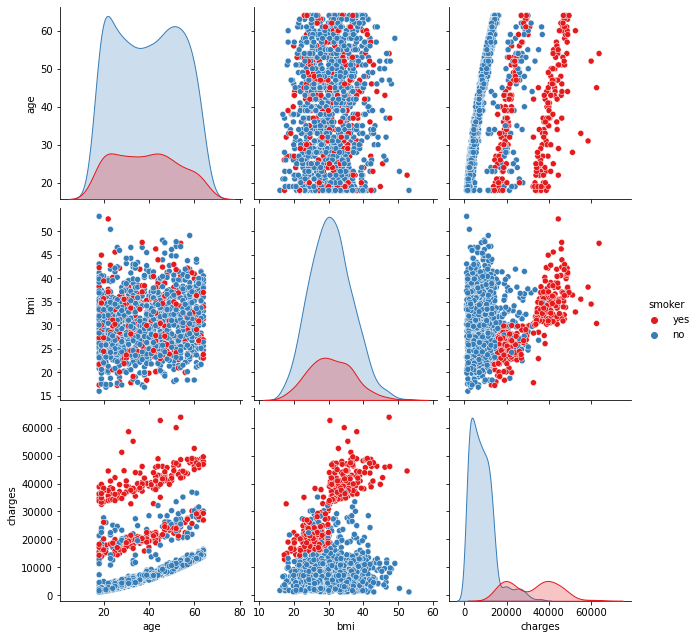

In [40]:
sns.pairplot(df[["age", "bmi", "charges", "smoker"]],
            hue = "smoker",
            height = 3,
            palette="Set1")

## Handle Outliers

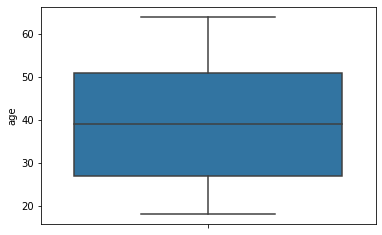

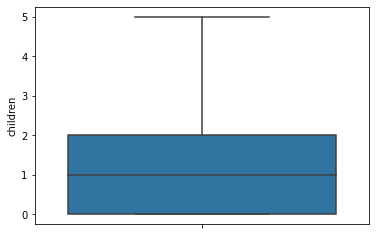

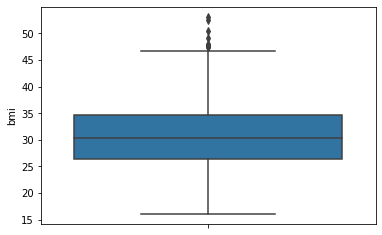

In [16]:
var_list = ['age','children','bmi']

for col in var_list:
    sns.boxplot(y = col,data = df)
    plt.show()

### Finding Correlation in varaibale

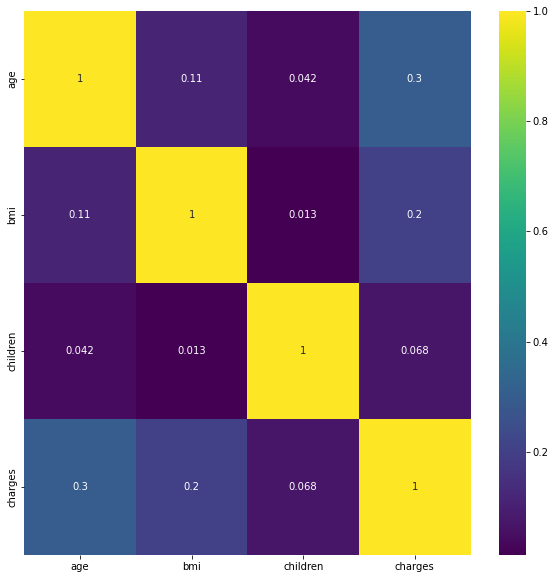

In [19]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='viridis')

### No correlation, except with the smoking

### Here are the following trends : 
1. More the numbers of childers,lesser the charges. But this could also be because people with 4 or more children less. 
2. As age increases, charges also increases. This is expected. 
3. People belonging to all age groups have good BMI around 30. 

In [119]:
df['sex'] = df['sex'].map({'female':0, 'male':1})

In [120]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [121]:
df['smoker'] = df['smoker'].map({'yes':0, 'no' : 1})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520


### One Hot_LabelEncoder

In [122]:
dummies = pd.get_dummies(df['region'])
dummies

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [123]:
merged = pd.concat([df,dummies],axis='columns')
merged

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,0,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,1,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,1,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,1,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,1,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,northwest,10600.54830,0,1,0,0
1334,18,0,31.920,0,1,northeast,2205.98080,1,0,0,0
1335,18,0,36.850,0,1,southeast,1629.83350,0,0,1,0
1336,21,0,25.800,0,1,southwest,2007.94500,0,0,0,1


In [124]:
final =  merged.drop(['region'], axis = 'columns')
final

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,0,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,0,1,0,0
1334,18,0,31.920,0,1,2205.98080,1,0,0,0
1335,18,0,36.850,0,1,1629.83350,0,0,1,0
1336,21,0,25.800,0,1,2007.94500,0,0,0,1


### Split the data into X and Y variables

In [125]:
X = final.drop(['charges'], axis = 'columns')
X

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,0,0,0,0,1
1,18,1,33.770,1,1,0,0,1,0
2,28,1,33.000,3,1,0,0,1,0
3,33,1,22.705,0,1,0,1,0,0
4,32,1,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,0,1,0,0
1334,18,0,31.920,0,1,1,0,0,0
1335,18,0,36.850,0,1,0,0,1,0
1336,21,0,25.800,0,1,0,0,0,1


In [126]:
y = final['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Split the data into train and test model

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = LinearRegression()

# 1. Linear Regression

In [141]:
model.fit(X,y)

LinearRegression()

In [142]:
model.score(X,y)

0.7509130345985207

In [143]:
model.predict(X)

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

# 2. Gradient Boosting Regressor

In [152]:
from sklearn.ensemble import GradientBoostingRegressor

In [155]:
gbr = GradientBoostingRegressor()
gbr.fit(X,y)
print("Accuracy_score=",gbr.score(X,y))

Accuracy_score= 0.8987356739004363


In [159]:
gbr.predict(X)

array([19270.24842875,  3715.04903292,  6492.55393763, ...,
        2577.24800066,  2480.1732146 , 28966.55847772])

# 3. Random Forest Regressor

In [173]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X,y)
print("Accuracy_score=",rf.score(X,y))

Accuracy_score= 0.9762063862863771


In [160]:
rf.predict(X)

array([16978.1211435 ,  1931.2532969 ,  4652.1616863 , ...,
        1907.58719617,  2040.2298135 , 28953.1043675 ])

In [158]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sms
reg_model = sms.OLS(endog = y,exog = ).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        16:24:21   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.8564     11.899     21.587      0.000     233.514     280.199
sex         -131.3144    332.945     -0.394      0.693    -784.470     521.842
bmi          339.1935     28.599     11.860      0.000     283.088     395.298
children     475.5005    137.804      3.451      0.001     205.163     745.838
smoker     -2.385e+04    413.153    -57.723      0.000   -2.47e+04    -2.3e+04
northeast   1.191e+04   1033.924     11.519      0.000    9881.695    1.39e+04
northwest   1.156e+04   1038.931     11.124      0.000    9518.909    1.36e+04
southeast   1.087e+04   1114.440      9.758      0.000    8688.721    1.31e+04
southwest   1.095e+04   1069.948     10.234      0.000    8850.974     1.3e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         635.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[2] R² is computed without centering (uncentered) since the model does not contain a constant.

## Conclusion: like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age. Random Forest Regression turned out to be the best model